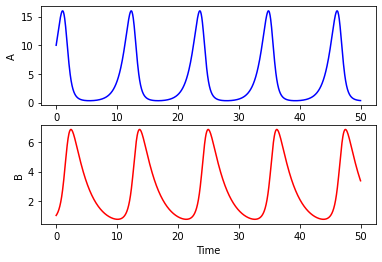

In [5]:
import numpy as np
import matplotlib
# matplotlib.use('tkagg')
import matplotlib.pyplot as plt
from scipy.integrate import odeint


initial_populations = [10,1] # [prey, predators] units in hundreds

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,50,num=1000)

# Set rates that lead to periodicity
####################################
prey_growth_rate = 1.1 #natural prey growth rate
prey_death_rate = 0.4 #of all pred/prey pairs (their multiple), how much prey death?
predator_growth_rate = 0.1 #of all pred/prey pairs (their multiple), how much predator growth?
predator_death_rate = 0.4 #natural pred death rate

# There actually is a steady state (other than [0,0])
# initial_populations = [predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate] # [prey, predators] units in hundreds


params = [prey_growth_rate, prey_death_rate, predator_growth_rate, predator_death_rate]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):

    # prey population level
    prey_count = current_counts[0]

    # predatory population level
    predator_count = current_counts[1]


    prey_growth_rate = params[0]
    prey_death_rate = params[1]
    predator_growth_rate = params[2]
    predator_death_rate = params[3]

    dxdt = (prey_growth_rate * prey_count) - (prey_death_rate * prey_count * predator_count)
    dydt = (predator_growth_rate * prey_count * predator_count) - (predator_death_rate * predator_count)

    return([dxdt, dydt])

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
f,(prey,predator) = plt.subplots(2)

line1, = prey.plot(t,solutions[:,0], color="b")
line2, = predator.plot(t,solutions[:,1], color="r")

prey.set_ylabel("A")
predator.set_ylabel("B")
predator.set_xlabel("Time")

plt.show()
f.savefig('pred_prey.png')

/Users/jonathanfischer/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


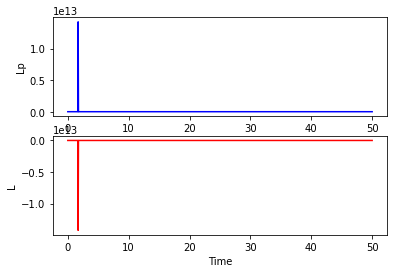

In [3]:
import numpy as np
import matplotlib
# matplotlib.use('tkagg')
import matplotlib.pyplot as plt
from scipy.integrate import odeint


initial_populations = [10,20,5,8] # [prey, predators] units in hundreds

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,50,num=1000)

# Set rates that lead to periodicity
####################################
Lp_forward_rate = 1.1 #natural prey growth rate
Lp_reverse_rate = 0.4 #of all pred/prey pairs (their multiple), how much prey death?
AP_forward_rate = 0.1 #of all pred/prey pairs (their multiple), how much predator growth?
AP_reverse_rate = 0.4 #natural pred death rate
A_forward_rate = 0.5 #of all pred/prey pairs (their multiple), how much predator growth?
A_reverse_rate = 0.2 #natural pred death rate
A_destruct = 1

#Enzyme counts
K_count = 10
P_count = 5

# There actually is a steady state (other than [0,0])
# initial_populations = [predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate] # [prey, predators] units in hundreds


params = [Lp_forward_rate, Lp_reverse_rate, AP_forward_rate, AP_reverse_rate, A_forward_rate, A_reverse_rate,
         A_destruct, K_count, P_count]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):

    # Lp population level
    Lp = current_counts[0]

    # L population level
    L = current_counts[1]
    
    # AP population level
    AP = current_counts[2]
    
    #A population level
    A = current_counts[3]


    kf = params[0]
    kr = params[1]
    ka1 = params[2]
    kb1 = params[3]
    ka2 = params[4]
    kb2 = params[5]
    k_death = params[6]
    K = params[7]
    P = params[8]
    
    Lp_diff = (kf*L*K) - (kr*Lp*AP)
    L_diff = (kr*Lp*AP) - (kf*L*K)
    AP_diff = (ka1*A*P) - (kb1*AP)
    A_diff = (ka2*L*Lp) - (kb2*(Lp**2)) - (k_death*A)

    #dxdt = (prey_growth_rate * prey_count) - (prey_death_rate * prey_count * predator_count)
    #dydt = (predator_growth_rate * prey_count * predator_count) - (predator_death_rate * predator_count)

    return([Lp_diff, L_diff, AP_diff, A_diff])

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
f,(Lp,L) = plt.subplots(2)

line1, = Lp.plot(t,solutions[:,0], color="b")
line2, = L.plot(t,solutions[:,1], color="r")

Lp.set_ylabel("Lp")
L.set_ylabel("L")
L.set_xlabel("Time")

plt.show()